In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pickle
import pandas as pd

# read in the graph
G = pickle.load(open('major_us_cities', 'rb'))
H = nx.DiGraph()


In [3]:
csvData = pd.read_csv("draftIntegrated.csv")
csvDataRefined = csvData.drop([0,15,23], axis=0)

In [4]:
for i, row in csvDataRefined.iterrows():
    arcs = []
    listInst = row["receivers"].split(",")
    for idx, el in enumerate(listInst):
        if idx < len(listInst)-1:
            transfer = (el,listInst[idx+1])
            arcs.append(transfer)
        else:
            arcs.append((el, row["surrenders"].split(",")[-1]))
    H.add_edges_from(arcs)

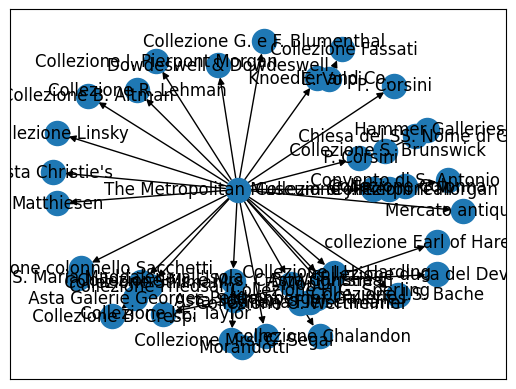

In [5]:
nx.write_gexf(H, "metzeri.gexf")
nx.draw_networkx(H)
plt.show()

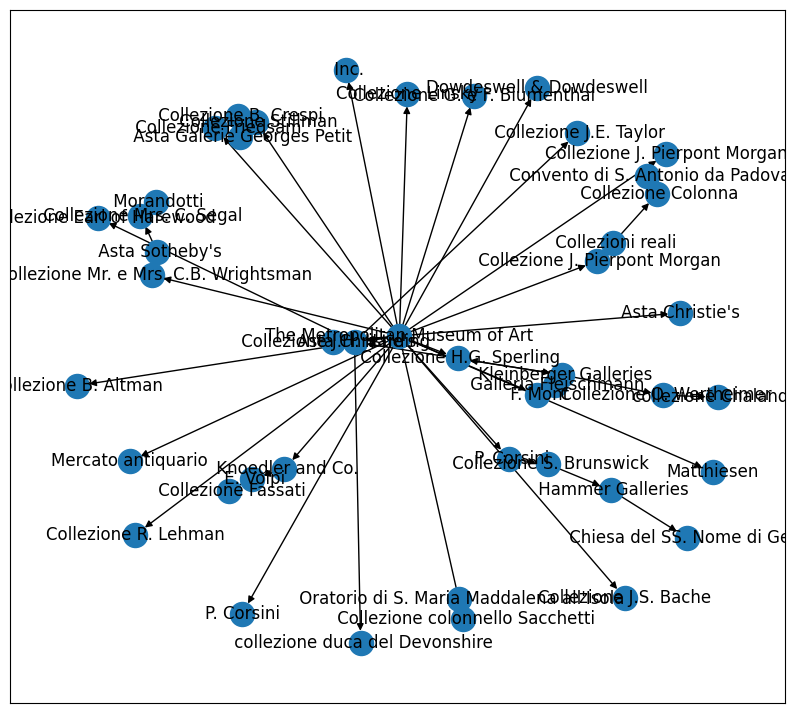

In [6]:
plt.figure(figsize=(10,9))
nx.draw_networkx(H)

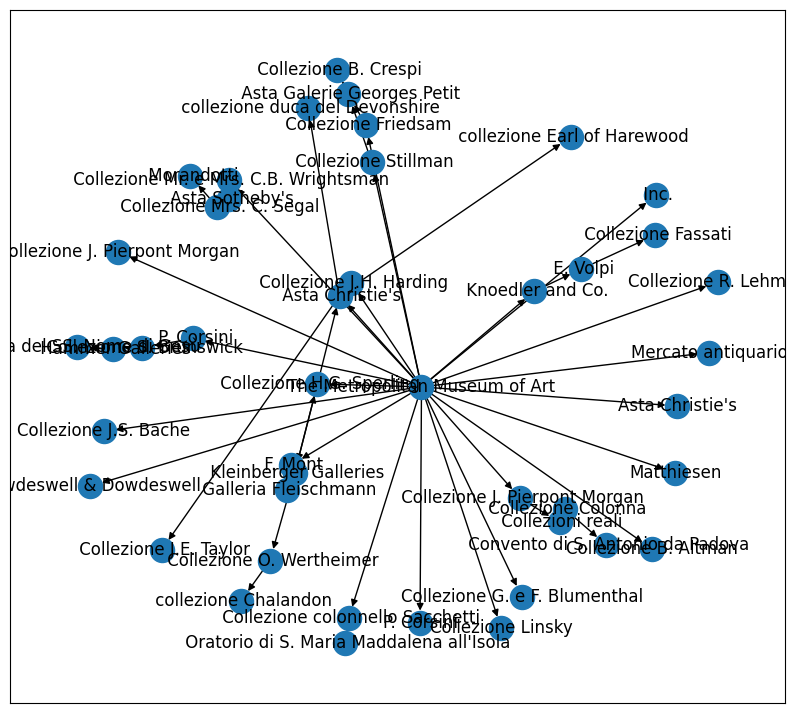

In [7]:
# draw the graph using the default spring layout
plt.figure(figsize=(10,9))
nx.draw_networkx(H)

In [8]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['bipartite_layout',
 'circular_layout',
 'kamada_kawai_layout',
 'random_layout',
 'rescale_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'planar_layout',
 'fruchterman_reingold_layout',
 'spiral_layout',
 'multipartite_layout']

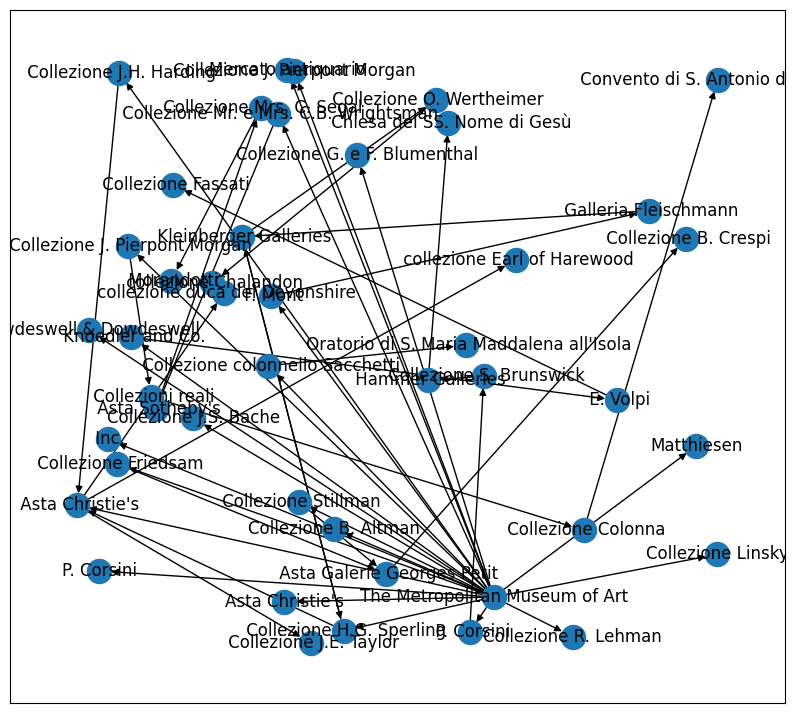

In [9]:
# Draw the graph using the random layout
plt.figure(figsize=(10,9))
pos = nx.random_layout(H)
nx.draw_networkx(H, pos)

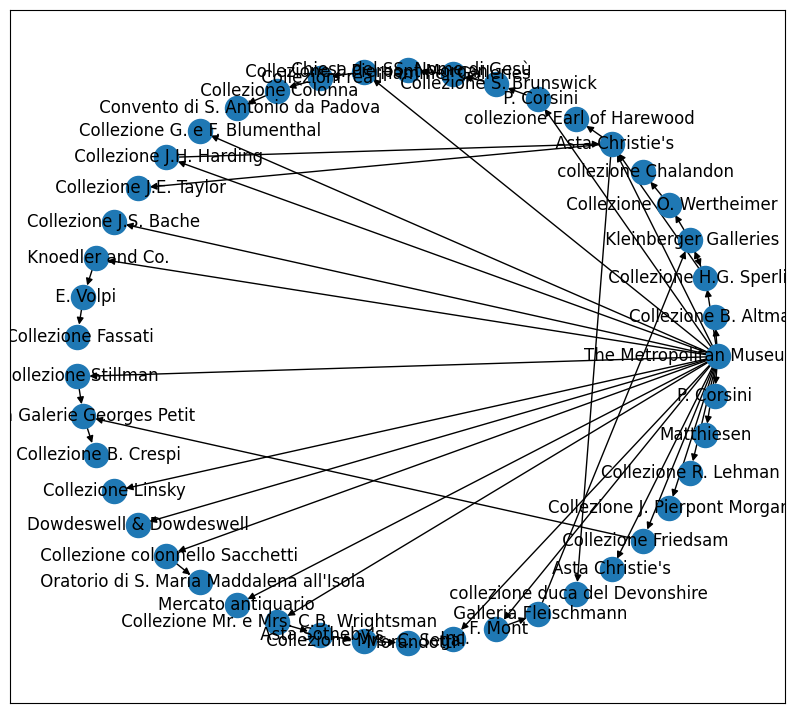

In [10]:
# Draw the graph using the circular layout
plt.figure(figsize=(10,9))
pos = nx.circular_layout(H)
nx.draw_networkx(H, pos)

In [11]:
# Draw the graph using custom node positions
plt.figure(figsize=(10,7))

pos = nx.get_node_attributes(H)
nx.draw_networkx(H, pos)

TypeError: get_node_attributes() missing 1 required positional argument: 'name'

<Figure size 1000x700 with 0 Axes>

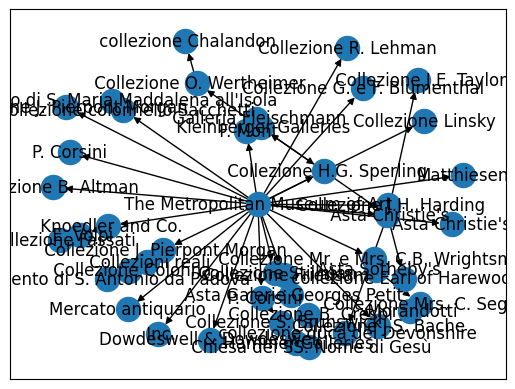

In [12]:
pos=nx.draw_networkx(H)


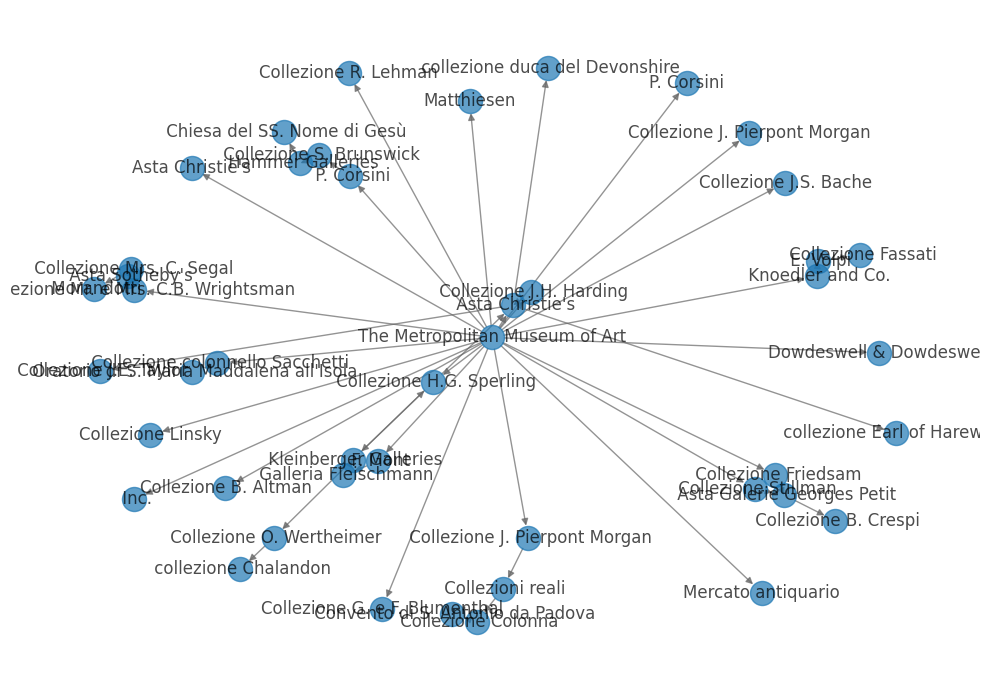

In [13]:
# Draw the graph adding alpha, removing labels, and softening edge color
plt.figure(figsize=(10,7))

nx.draw_networkx(H, pos, alpha=0.7, with_labels=True, edge_color='.4')

plt.axis('off')
plt.tight_layout();

TypeError: 'NoneType' object is not subscriptable

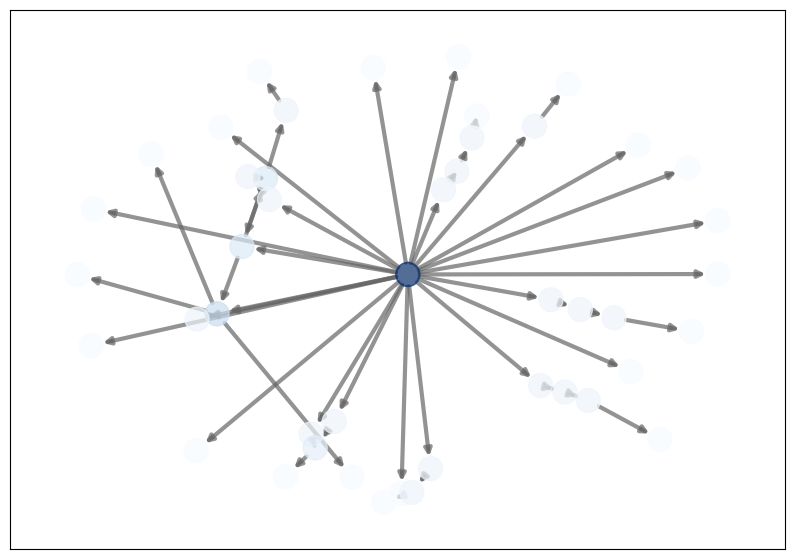

In [14]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [H.degree(v) for v in H]
node_size = 300#[0.0005*nx.get_node_attributes(H, 'population')[v] for v in G]
edge_width = 3#[0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(H, pos, node_size=node_size,
                 node_color=node_color, alpha=0.7, with_labels=False,
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

nx.draw_networkx_labels(H, pos, labels={'The Metropolitan Museum of Art': 'MET'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();

In [15]:
# Draw graph with varying node color, node size, and edge width
plt.figure(figsize=(10,7))

node_color = [H.degree(v) for v in H]
node_size = [0.0005*nx.get_node_attributes(H, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(H, pos, node_size=node_size,
                 node_color=node_color, alpha=0.7, with_labels=False,
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)

plt.axis('off')
plt.tight_layout();

KeyError: 'El Paso, TX'

<Figure size 1000x700 with 0 Axes>

TypeError: 'NoneType' object is not subscriptable

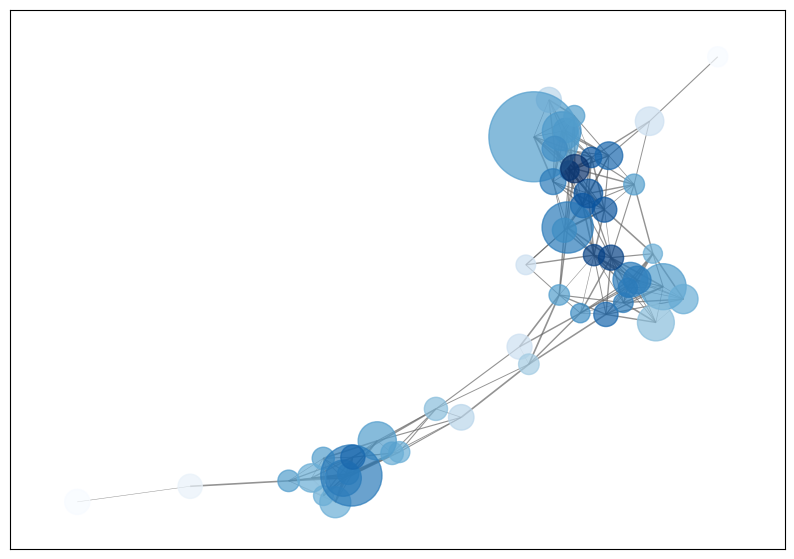

In [16]:
# Draw specific edges and add labels to specific nodes
plt.figure(figsize=(10,7))

node_color = [G.degree(v) for v in G]
node_size = [0.0005*nx.get_node_attributes(G, 'population')[v] for v in G]
edge_width = [0.0015*G[u][v]['weight'] for u,v in G.edges()]

nx.draw_networkx(G, pos, node_size=node_size,
                 node_color=node_color, alpha=0.7, with_labels=False,
                 width=edge_width, edge_color='.4', cmap=plt.cm.Blues)


greater_than_770 = [x for x in G.edges(data=True) if x[2]['weight']>770]
nx.draw_networkx_edges(G, pos, edgelist=greater_than_770, edge_color='r', alpha=0.4, width=6)

nx.draw_networkx_labels(G, pos, labels={'Los Angeles, CA': 'LA', 'New York, NY': 'NYC'}, font_size=18, font_color='w')

plt.axis('off')
plt.tight_layout();

In [17]:
print(G)

Graph with 51 nodes and 235 edges


In [18]:
df_g = nx.to_pandas_edgelist(G)
df_g

,source,target,weight
0,"El Paso, TX","Albuquerque, NM",367.885844
1,"El Paso, TX","Mesa, AZ",536.256660
2,"El Paso, TX","Tucson, AZ",425.413867
3,"El Paso, TX","Phoenix, AZ",558.783570
4,"El Paso, TX","Colorado Springs, CO",797.751712
...,...,...,...
230,"Detroit, MI","Columbus, OH",263.423765
231,"Nashville-Davidson, TN","Milwaukee, WI",770.146706
232,"Nashville-Davidson, TN","Columbus, OH",536.274548
233,"Milwaukee, WI","Columbus, OH",532.568423


In [19]:
print(G.edges)


[('El Paso, TX', 'Albuquerque, NM'), ('El Paso, TX', 'Mesa, AZ'), ('El Paso, TX', 'Tucson, AZ'), ('El Paso, TX', 'Phoenix, AZ'), ('El Paso, TX', 'Colorado Springs, CO'), ('Long Beach, CA', 'Oakland, CA'), ('Long Beach, CA', 'Mesa, AZ'), ('Long Beach, CA', 'Sacramento, CA'), ('Long Beach, CA', 'Tucson, AZ'), ('Long Beach, CA', 'San Jose, CA'), ('Long Beach, CA', 'Fresno, CA'), ('Long Beach, CA', 'San Diego, CA'), ('Long Beach, CA', 'Phoenix, AZ'), ('Long Beach, CA', 'San Francisco, CA'), ('Long Beach, CA', 'Los Angeles, CA'), ('Long Beach, CA', 'Las Vegas, NV'), ('Dallas, TX', 'Arlington, TX'), ('Dallas, TX', 'Wichita, KS'), ('Dallas, TX', 'Oklahoma City, OK'), ('Dallas, TX', 'New Orleans, LA'), ('Dallas, TX', 'Houston, TX'), ('Dallas, TX', 'Kansas City, MO'), ('Dallas, TX', 'San Antonio, TX'), ('Dallas, TX', 'Memphis, TN'), ('Dallas, TX', 'Tulsa, OK'), ('Dallas, TX', 'Austin, TX'), ('Dallas, TX', 'Fort Worth, TX'), ('Oakland, CA', 'Sacramento, CA'), ('Oakland, CA', 'San Jose, CA'), ('O